<a href="https://colab.research.google.com/github/JuanJoMontilla/Senales-y-Sistemas/blob/main/Desarrollo%20Parcial%201%20SYS%202024-I/Dashboard%20Parcial%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dashboard Parcial 2 Sys 2024-I**

In [28]:
token = '2lLFMBWiinIoZUi3bX7RF26eFeD_5KBTy8DqrMYoE2mf5Sqnc' #colocar aquí su token personal después de crear su cuenta con correo UNAL en Ngrok

In [29]:
from pyngrok import ngrok

# Set authentication token (unique per user)
ngrok.set_auth_token(token)

# Start Streamlit server on a specific port
!nohup streamlit run detector.py --server.port 5011 &

# Start ngrok tunnel to expose the Streamlit server
ngrok_tunnel = ngrok.connect(addr='5011', proto='http', bind_tls=True)

# Print the URL of the ngrok tunnel
print(' * Tunnel URL:', ngrok_tunnel.public_url)

nohup: appending output to 'nohup.out'
 * Tunnel URL: https://9b96-34-127-99-123.ngrok-free.app


In [30]:
#exit("Stopping the execution")

In [31]:
!pip install streamlit -q #instalación de librerías
!pip install pyngrok

In [32]:
"""
%%writefile app.py
import streamlit as st

st.write('# Hello World ')
st.write('## Run Streamlit on Colab with `pyngrok` ')
"""

"\n%%writefile app.py\nimport streamlit as st\n\nst.write('# Hello World ')\nst.write('## Run Streamlit on Colab with `pyngrok` ')\n"

3 Punto

In [33]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached mutagen-1.47.0-py3-none-any.whl.metadata (1.7 kB)
  Using cached pycryptodomex-3.20.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
  Using cached websockets-13.0.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cach

In [34]:
%%writefile detector.py

import streamlit as st
import pandas as pd
import numpy as np
import os
import subprocess
import soundfile as sf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from pyngrok import ngrok
import yt_dlp as youtube_dl
import joblib

Overwriting detector.py


In [35]:
import os
import yt_dlp as youtube_dl
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

In [36]:
link_= ["https://www.youtube.com/watch?v=GaXuMC_GHEE"]
name_ = ["CAPAREZZA"
        ]
for name,link in zip(name_,link_):
    print(name)
    download_ytvid_as_mp3(link,name)

CAPAREZZA
[youtube] Extracting URL: https://www.youtube.com/watch?v=GaXuMC_GHEE
[youtube] GaXuMC_GHEE: Downloading webpage
[youtube] GaXuMC_GHEE: Downloading ios player API JSON
[youtube] GaXuMC_GHEE: Downloading web creator player API JSON
[youtube] GaXuMC_GHEE: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=GaXuMC_GHEE
[youtube] GaXuMC_GHEE: Downloading webpage
[youtube] GaXuMC_GHEE: Downloading ios player API JSON
[youtube] GaXuMC_GHEE: Downloading web creator player API JSON
[youtube] GaXuMC_GHEE: Downloading m3u8 information
[info] GaXuMC_GHEE: Downloading 1 format(s): 251
[download] CAPAREZZA.mp3 has already been downloaded
[download] 100% of    3.59MiB
Download complete... CAPAREZZA.mp3


In [37]:
import subprocess

for name in name_:
    subprocess.call(['ffmpeg','-y', '-i', name+'.mp3',
                   name+'.wav'])

In [38]:
import numpy as np
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
for name in name_:
    nombre_out = "output.wav"
    x, fm = sf.read(name+'.wav')
    x_mono = np.mean(x, axis=1)
    print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fm,name+'.wav'))
x.shape

Frecuencia de muestreo 48000.00[Hz]
audio CAPAREZZA.wav


(11681681, 2)

In [39]:
from IPython.display import Audio
ns =60 #se reproducen los primeros ns segundos
Audio(x[fm*30:int(fm*ns),:].T,rate=fm)

Longitud de x_mono: 11681681 muestras (264.89 segundos)
Longitud de t_segment: 220500
Longitud de x_mono_segment: 220500


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


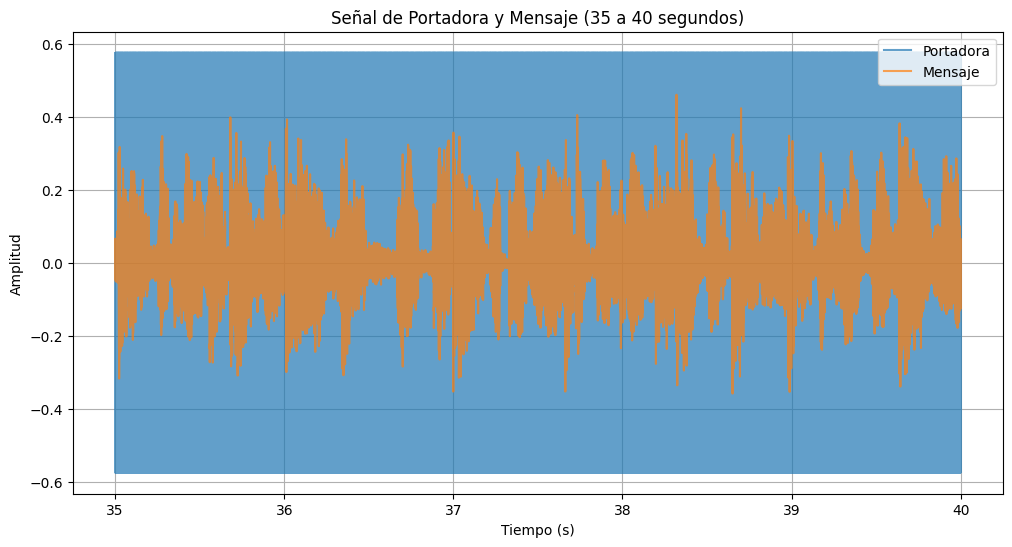

In [40]:
import matplotlib.pyplot as plt
# Parámetros de ejemplo
fs = 44100  # Frecuencia de muestreo en Hz
ns = 7  # Duración total de la señal en segundos (actualizada según longitud de x_mono)
t = np.arange(0, ns, 1/fs)  # Vector de tiempo para la señal

# Convierte a mono si es estéreo
if x.ndim > 1:
    x_mono = np.mean(x, axis=1)
else:
    x_mono = x

# Verificar la longitud de x_mono
print(f"Longitud de x_mono: {len(x_mono)} muestras ({len(x_mono)/fs:.2f} segundos)")

# Selecciona un segmento válido dentro de la duración de la señal
start_time = 35  # Segundo de inicio
end_time = 40    # Segundo de fin

# Calcula los índices de inicio y fin basados en los tiempos especificados
start_index = int(start_time * fs)
end_index = int(end_time * fs)

# Verifica que los índices estén dentro del rango de la señal
if start_index >= len(x_mono):
    raise ValueError("El índice de inicio está fuera del rango de la señal.")
if end_index > len(x_mono):
    end_index = len(x_mono)

# Ajusta el vector de tiempo y la señal a este segmento
x_mono_segment = x_mono[start_index:end_index]
t_segment = np.arange(start_time, end_time, 1/fs)  # Ajusta el vector de tiempo para el segmento

# Verifica que las dimensiones coincidan
print(f"Longitud de t_segment: {len(t_segment)}")
print(f"Longitud de x_mono_segment: {len(x_mono_segment)}")

# Definición de la portadora para este segmento
Fc = 10000  # Frecuencia de la portadora
Ac = max(abs(x_mono_segment)) / 0.8  # Amplitud de la portadora según el índice de modulación
c_segment = Ac * np.sin(2 * np.pi * Fc * t_segment)  # Genera la señal de portadora

# Graficar las señales ajustadas
plt.figure(figsize=(12, 6))
plt.plot(t_segment, c_segment, label='Portadora', alpha=0.7)
plt.plot(t_segment, x_mono_segment, label='Mensaje', alpha=0.7)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal de Portadora y Mensaje (35 a 40 segundos)')
plt.legend()
plt.grid(True)
plt.show()

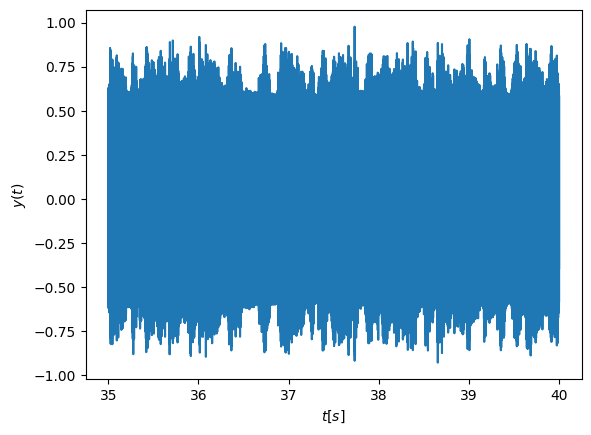

In [41]:
y = (1+x_mono_segment/Ac)*c_segment #señal modulada en AM
plt.plot(t_segment,y) # Use t_segment for plotting since it corresponds to y
plt.xlabel('$t[s]$') # Fix typo in the string
plt.ylabel('$y(t)$') # Fix typo in the string
plt.show()

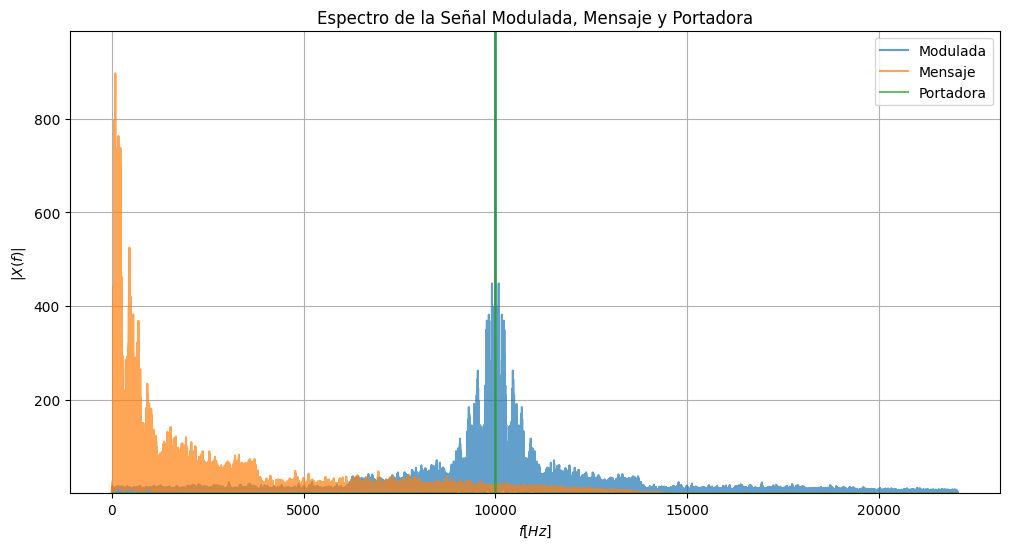

In [42]:
# Calculo de los espectros
Xfc = np.fft.rfft(c_segment)
Xfm = np.fft.rfft(x_mono_segment)
Xfy = np.fft.rfft(y)

# Frecuencias correspondientes
vfre = np.fft.rfftfreq(len(c_segment), 1/fs)

# Graficar los espectros
plt.figure(figsize=(12, 6))
plt.plot(vfre, np.abs(Xfy), label='Modulada', alpha=0.7)
plt.plot(vfre, np.abs(Xfm), label='Mensaje', alpha=0.7)
plt.plot(vfre, np.abs(Xfc), label='Portadora', alpha=0.7)
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.legend()
plt.grid(True)
plt.title('Espectro de la Señal Modulada, Mensaje y Portadora')
plt.ylim([min(np.abs(Xfm)), 1.1 * max(np.abs(Xfm))])
plt.show()

In [43]:
#st.title("Expresión del espectro de Fourier(forma exponencial y trigonométrica) para la señal $$x(t) = {\(A * sp.sin(2 * sp.pi * Fo * t))**2}$$")

In [44]:
#st.line_chart()